In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Data split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Drawing Decision Tree
from graphviz import Source
from sklearn.tree import export_graphviz

In [ ]:
penguins = sns.load_dataset('penguins')

In [ ]:
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
# Label Encoder transformation
#The above code is used to convert the values in the 'species' and 'island' columns of the 'penguins' tuple from string to number.
#First, we initialize two LabelEncoder objects 'species_label' and 'island_label'. We then use the LabelEncoder's 'fit_transform' method to convert the values in the 'species' and 'island' columns to numbers and save the results in the new columns 'species_nu' and 'island_nu'.
#Finally, we remove the columns 'species', 'island', 'sex' from the dataset and assign the result to the variable 'X'.
from sklearn.preprocessing import LabelEncoder
species_label = LabelEncoder()
island_label = LabelEncoder()

penguins['species_nu'] = species_label.fit_transform(penguins['species'])
penguins['island_nu'] = island_label.fit_transform(penguins['island'])

X = penguins.drop(columns=['species', 'island', 'sex'])
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_nu,island_nu
0,39.1,18.7,181.0,3750.0,0,2
1,39.5,17.4,186.0,3800.0,0,2
2,40.3,18.0,195.0,3250.0,0,2
4,36.7,19.3,193.0,3450.0,0,2
5,39.3,20.6,190.0,3650.0,0,2
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,2,0
340,46.8,14.3,215.0,4850.0,2,0
341,50.4,15.7,222.0,5750.0,2,0
342,45.2,14.8,212.0,5200.0,2,0


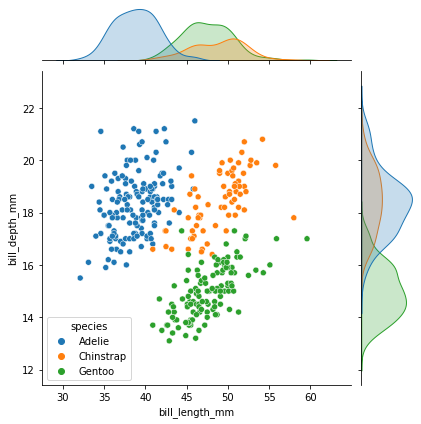

In [ ]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20520115)
model = DecisionTreeClassifier(random_state=20520115) 
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=20520115)

In [ ]:
model.score(X_test, y_test)

0.85

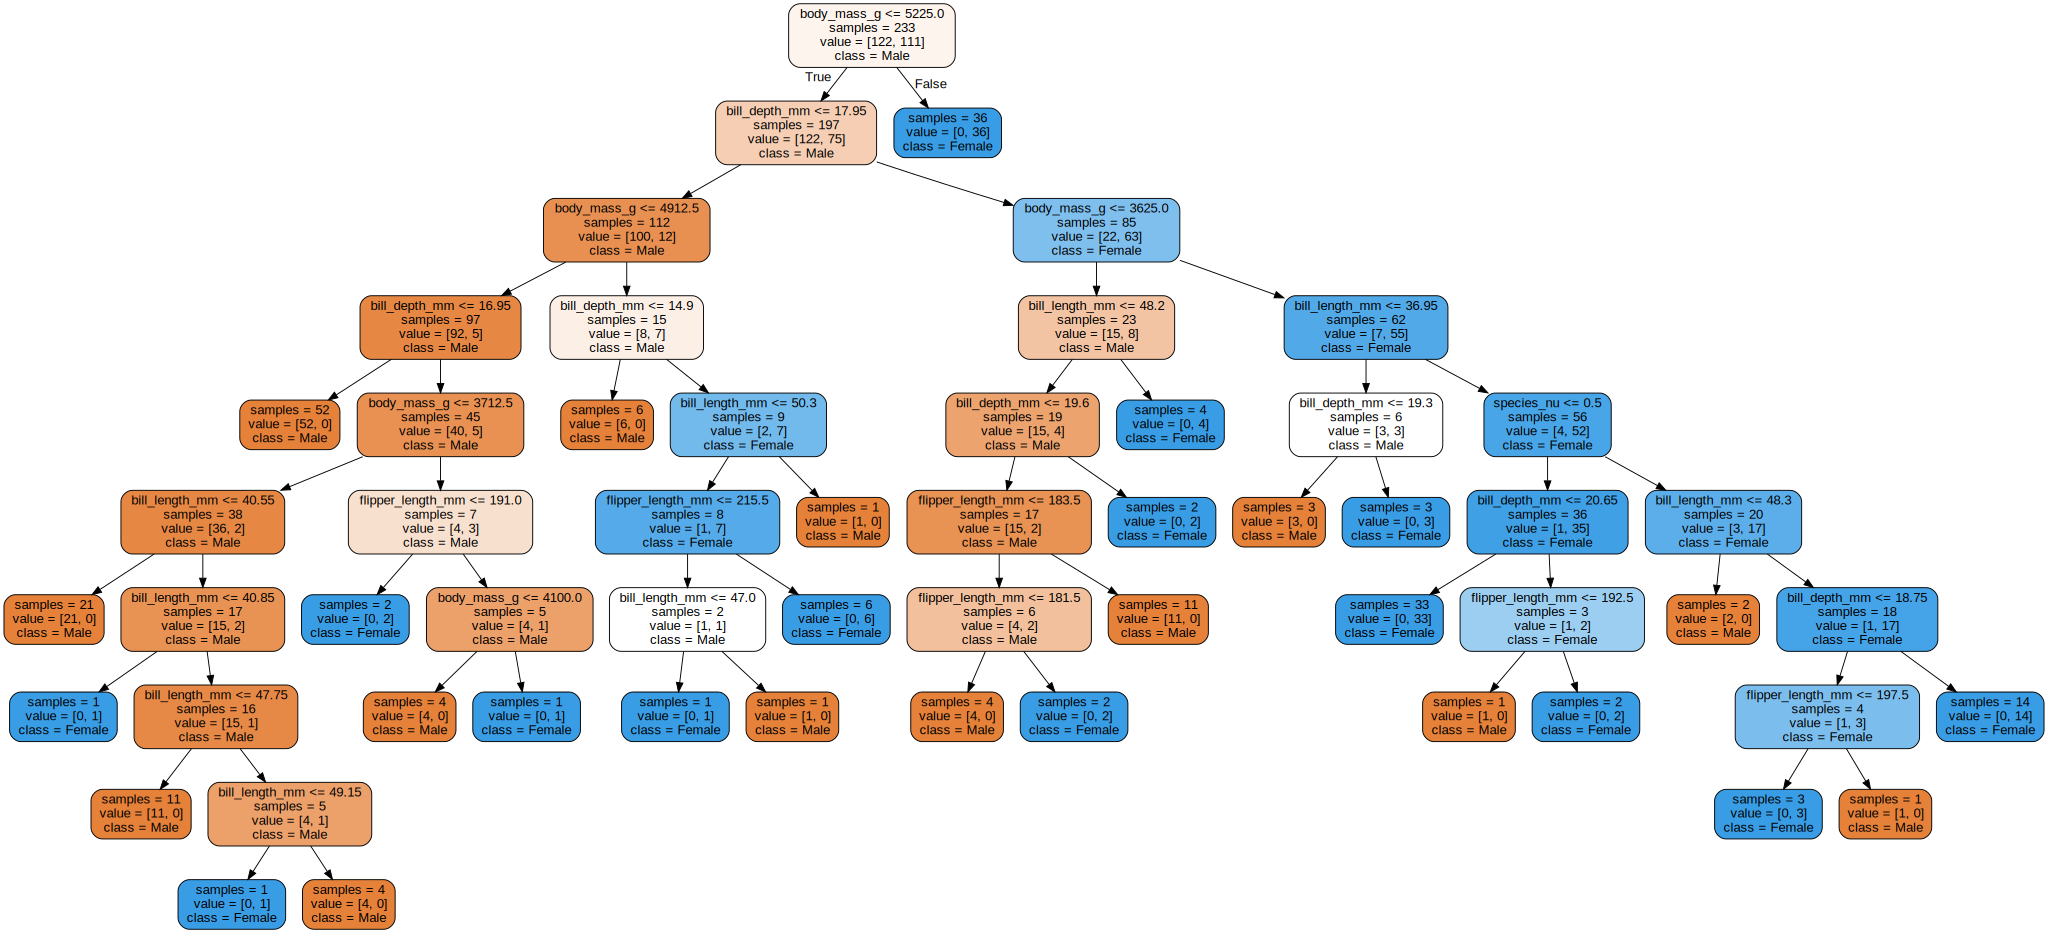

In [ ]:
# Decision Tree with max_depth = None (default setting)
#The above code is used to export the decision tree model of the "model" model to the file "penguins.dot", with the featured names being the columns of the "X" dataset, the class names being "penguins.sex" ", and other parameters are not mixed, complete, and round. Then it will create a "Source" object from the file "penguins.dot".
export_graphviz(model, out_file='penguins.dot', feature_names=X.columns, class_names=penguins.sex, impurity=False, filled=True, rounded=True)
Source.from_file('penguins.dot')

In [ ]:
new_model = DecisionTreeClassifier(max_depth=1, random_state=20520115)
new_model.fit(X_train, y_train)
new_model.score(X_test, y_test)

0.56

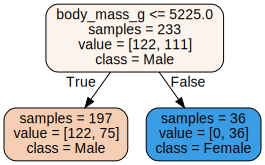

In [ ]:
export_graphviz(new_model, out_file='penguins.dot', feature_names=X.columns, class_names=penguins.sex, impurity=False, filled=True, rounded=True)
Source.from_file('penguins.dot')

In [ ]:
new_model_2 = DecisionTreeClassifier(max_depth=2, random_state=20520115) #max_depth=2 => số tầng của cây cho phép phân nhánh là 2
new_model_2.fit(X_train, y_train)
new_model_2.score(X_test, y_test)

0.83

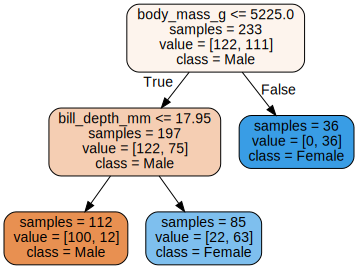

In [ ]:
export_graphviz(new_model_2, out_file='penguins.dot', feature_names=X.columns, class_names=penguins.sex, impurity=False,filled=True, rounded=True)
Source.from_file('penguins.dot')